# CAR PRICE PREDICTION

In [81]:
#IMPORT LIBRARIES:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings("ignore")

In [82]:
#IMPORT DATA:

data=pd.read_excel("merc.xlsx")
df=data.copy()
df.head()

year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
3  2016  61948    Automatic    16000  325  30.4         4.0
4  2016  73948    Automatic     4000  325  30.1         4.0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [84]:
#Feature Engineering:
df.rename(columns={"mileage":"KmAge","mpg":"Kmpg"},inplace=True)
df["KmAge"]=df["KmAge"]*1.609344
df["Kmpg"]=df["Kmpg"]*0.425144
df.head()

year  price transmission        KmAge  tax       Kmpg  engineSize
0  2005   5200    Automatic  101388.6720  325  13.647122         1.8
1  2017  34948    Automatic   43452.2880   20  26.103842         2.1
2  2016  49948    Automatic    9977.9328  555  11.904032         5.5
3  2016  61948    Automatic   25749.5040  325  12.924378         4.0
4  2016  73948    Automatic    6437.3760  325  12.796834         4.0

In [85]:
#rename columns:

df.rename(columns={"KmAge":"TotalKm","Kmpg":"ConsumingPerKm"},inplace=True)
df.head()

year  price transmission      TotalKm  tax  ConsumingPerKm  engineSize
0  2005   5200    Automatic  101388.6720  325       13.647122         1.8
1  2017  34948    Automatic   43452.2880   20       26.103842         2.1
2  2016  49948    Automatic    9977.9328  555       11.904032         5.5
3  2016  61948    Automatic   25749.5040  325       12.924378         4.0
4  2016  73948    Automatic    6437.3760  325       12.796834         4.0

In [86]:
df.describe()

year          price        TotalKm           tax  \
count  13119.000000   13119.000000   13119.000000  13119.000000   
mean    2017.296288   24698.596920   35324.391138    129.972178   
std        2.224709   11842.675542   34080.292959     65.260286   
min     1970.000000     650.000000       1.609344      0.000000   
25%     2016.000000   17450.000000    9812.975040    125.000000   
50%     2018.000000   22480.000000   24444.326016    145.000000   
75%     2019.000000   28980.000000   51144.147648    145.000000   
max     2020.000000  159999.000000  416820.096000    580.000000   

       ConsumingPerKm    engineSize  
count    13119.000000  13119.000000  
mean        23.449176      2.071530  
std          6.470727      0.572426  
min          0.467658      0.000000  
25%         19.386566      1.800000  
50%         24.020636      2.000000  
75%         27.294245      2.100000  
max         92.383791      6.200000

In [87]:
df.isnull().sum() #There is no missing value.

year              0
price             0
transmission      0
TotalKm           0
tax               0
ConsumingPerKm    0
engineSize        0
dtype: int64

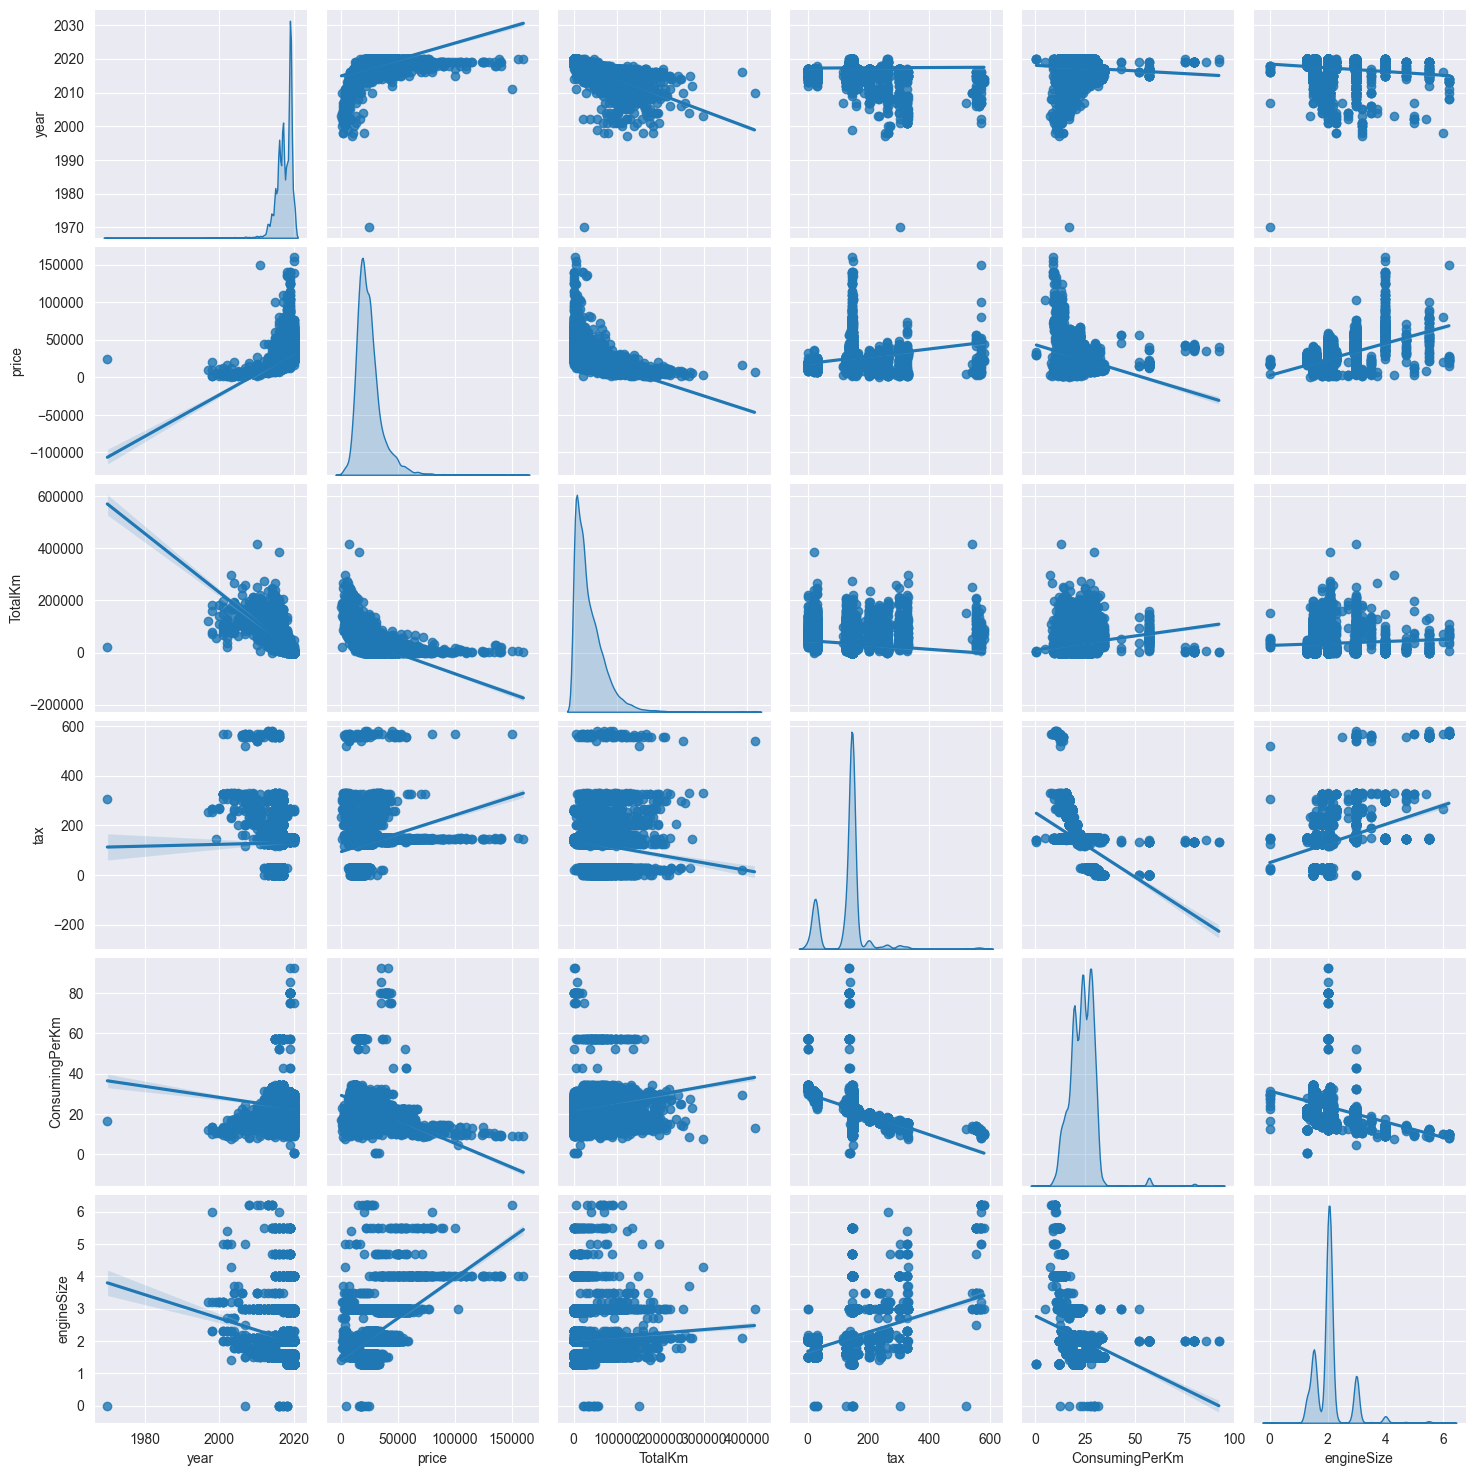

In [88]:
#EDA:
sns.pairplot(df,diag_kind="kde",kind="reg")

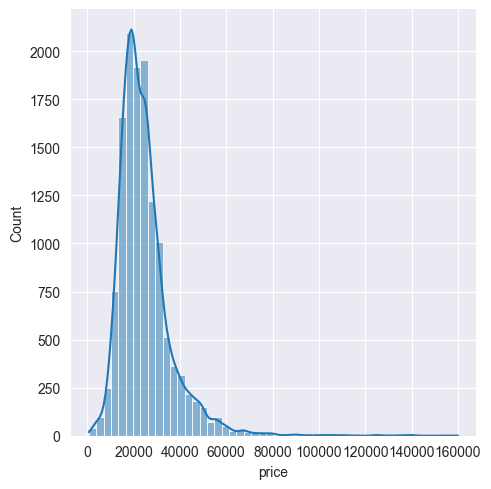

In [89]:
sns.displot(df["price"],bins=50,kde=True)
sns.set_style("darkgrid")

In [90]:
#Correlation Matrix:

px.imshow(df.corr(),title="Correlation Matrix",
          labels=dict(color="Correlation Coefficient"),width=700,height=700)

In [91]:
df.corr()["price"].sort_values(ascending=False)

price             1.000000
year              0.520712
engineSize        0.516126
tax               0.268717
ConsumingPerKm   -0.438445
TotalKm          -0.537214
Name: price, dtype: float64

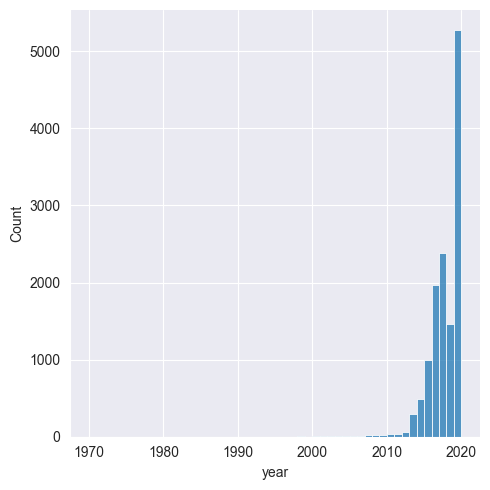

In [92]:
sns.displot(df["year"],bins=50)

In [93]:
# top 10 highest price cars

df.sort_values("price",ascending=False).head(10)

year   price transmission       TotalKm  tax  ConsumingPerKm  \
6199   2020  159999    Semi-Auto   2172.614400  145        9.098082   
10044  2020  154998    Automatic   4828.032000  150        9.098082   
5      2011  149948    Automatic   4828.032000  570        9.098082   
8737   2019  140319    Semi-Auto   1263.335040  150        9.395682   
6386   2018  139995    Semi-Auto  20995.501824  145        9.098082   
8      2019  139948    Automatic  19312.128000  145        9.098082   
9133   2019  139559    Semi-Auto   1609.344000  145        9.395682   
8821   2020  138439    Semi-Auto   1609.344000  145        9.395682   
5902   2018  135771    Semi-Auto  30577.536000  145        9.098082   
7864   2018  135124    Semi-Auto  29344.778496  150        9.098082   

       engineSize  
6199          4.0  
10044         4.0  
5             6.2  
8737          4.0  
6386          4.0  
8             4.0  
9133          4.0  
8821          4.0  
5902          4.0  
7864          4.0

In [94]:
# top 10 lowest price cars

df.sort_values("price",ascending=True).head(10)


year  price transmission        TotalKm  tax  ConsumingPerKm  \
11816  2003    650       Manual  175563.336960  235       17.005760   
12008  2010   1350       Manual  186886.681344  145       23.085319   
11765  2000   1490    Automatic  140012.928000  265       11.563917   
11549  2002   1495    Automatic   22208.947200  305       16.920731   
12594  2004   1495       Manual  191511.936000  300       14.667468   
11174  2001   1695    Automatic  175096.627200  325       13.477065   
12710  2006   1695    Automatic  246229.632000  300       14.284838   
12766  2004   1780    Automatic  189902.592000  265       17.643476   
12009  2007   1800    Automatic  135184.896000  200       18.196163   
11764  1998   1990    Automatic  159807.859200  265       13.647122   

       engineSize  
11816         1.4  
12008         2.0  
11765         3.2  
11549         2.7  
12594         1.8  
11174         3.2  
12710         1.8  
12766         2.2  
12009         1.5  
11764         2.3

In [95]:
# Data cleaning:

print(df.describe())

#clening most 131 expensive cars and 131 cheapest cars
df_cleaned=df.sort_values("price",ascending=False).iloc[131:-13]

df_cleaned.describe()

               year          price        TotalKm           tax  \
count  13119.000000   13119.000000   13119.000000  13119.000000   
mean    2017.296288   24698.596920   35324.391138    129.972178   
std        2.224709   11842.675542   34080.292959     65.260286   
min     1970.000000     650.000000       1.609344      0.000000   
25%     2016.000000   17450.000000    9812.975040    125.000000   
50%     2018.000000   22480.000000   24444.326016    145.000000   
75%     2019.000000   28980.000000   51144.147648    145.000000   
max     2020.000000  159999.000000  416820.096000    580.000000   

       ConsumingPerKm    engineSize  
count    13119.000000  13119.000000  
mean        23.449176      2.071530  
std          6.470727      0.572426  
min          0.467658      0.000000  
25%         19.386566      1.800000  
50%         24.020636      2.000000  
75%         27.294245      2.100000  
max         92.383791      6.200000  


year         price        TotalKm           tax  \
count  12975.000000  12975.000000   12975.000000  12975.000000   
mean    2017.295954  24097.397380   35482.266916    129.552987   
std        2.182225   9845.572702   33808.540184     65.053758   
min     1970.000000   2140.000000       1.609344      0.000000   
25%     2016.000000  17399.000000   10153.351296    125.000000   
50%     2018.000000  22306.000000   24680.899584    145.000000   
75%     2019.000000  28749.000000   51417.736128    145.000000   
max     2020.000000  65990.000000  416820.096000    580.000000   

       ConsumingPerKm    engineSize  
count    12975.000000  12975.000000  
mean        23.576881      2.050628  
std          6.385300      0.532372  
min          0.467658      0.000000  
25%         19.386566      1.600000  
50%         24.020636      2.000000  
75%         27.294245      2.100000  
max         92.383791      6.200000

<Figure size 700x500 with 0 Axes>

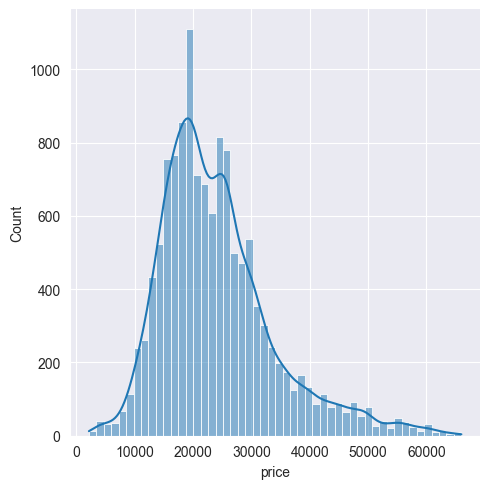

In [96]:
plt.figure(figsize=(7,5))
sns.displot(df_cleaned["price"],bins=50,kde=True)

In [97]:
#avaraage price of cars by year

a=df_cleaned.groupby("year").mean()["price"]

px.scatter(a,x=a.index,y="price",size="price",color="price",title="Average Price of Cars by Year",
           template="plotly_dark")

#in 1970 there is only one car which has a abnormal price, so we can drop it

In [98]:
df.drop(df[df["year"]==1970].index,axis=0,inplace=True)

a1=df.groupby("year").mean()["price"]
px.scatter(a1,x=a1.index,y="price",size="price",color="price",title="Average Price of Cars by Year",
              template="plotly_dark")

In [99]:
#Detection of Outliers:

for i in df.columns:
    fig=px.box(df[i],title=i,template="plotly_dark")
    fig.show()

In [100]:
#PREPERATION OF DATA FOR MODEL:

#drop unnecessary columns

df_cleaned.drop("transmission",axis=1,inplace=True)

df_cleaned.head()


year  price      TotalKm  tax  ConsumingPerKm  engineSize
6177  2019  65990  8169.030144  150       12.924378         3.0
5779  2020  65990  1607.734656  145       11.904032         4.0
3191  2020  65980  6435.766656  145       11.904032         4.0
4727  2019  65000  5468.550912  145       11.563917         4.0
8814  2019  64999   191.511936  145       17.388390         3.0

In [112]:

#normalization

X=df_cleaned.drop("price",axis=1)
y=df_cleaned["price"]

from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler(feature_range=(-1,1))
X=mm.fit_transform(X)


In [113]:
#train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#MODELING with TENSORFLOW:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

sq=Sequential()

sq.add(Dense(12,activation="relu",input_dim=5)) #input layer and hidden layer	
sq.add(Dense(12,activation="relu")) #hidden layer
sq.add(Dense(12,activation="relu")) #hidden layer
sq.add(Dense(12,activation="relu")) #hidden layer

sq.add(Dense(1)) #output layer

#compile model

sq.compile(optimizer="adam",loss="mse")

In [114]:
#train model
sq.fit(x=X_train,y=y_train,
       validation_data=(X_test,y_test),batch_size=250,epochs=300)
#batch_size is number of samples per gradient update
#epochs is number of epochs to train the model

Epoch 1/300
37/37 [==============================] - 2s 12ms/step - loss: 675324736.0000 - val_loss: 682934272.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 675305856.0000 - val_loss: 682901568.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 675235904.0000 - val_loss: 682755840.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 674880000.0000 - val_loss: 682011968.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 673372864.0000 - val_loss: 679314496.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 668731776.0000 - val_loss: 671852224.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 657300480.0000 - val_loss: 655020416.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 633497280.0000 - val_loss: 621969920.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 589931

In [115]:
#Evaluation of model:
loss=pd.DataFrame(sq.history.history)
loss.head()

loss     val_loss
0  675324736.0  682934272.0
1  675305856.0  682901568.0
2  675235904.0  682755840.0
3  674880000.0  682011968.0
4  673372864.0  679314496.0

In [116]:
#loss vs val_loss
px.line(loss,y=["loss","val_loss"],title="Loss vs Val_loss",template="plotly_dark",
        labels=dict(index="Epochs",value="Loss"))

In [119]:
pred=sq.predict(X_test)

print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred))) 
print("R2 Score:",r2_score(y_test,pred)) # 1 is best, 0 is worst
print("mean absolute error:",mean_absolute_error(y_test,pred)) 

  1/122 [..............................] - ETA: 2s

122/122 [==============================] - 0s 1ms/step
Mean Squared Error: 19815753.7810693
Root Mean Squared Error: 4451.488939789619
R2 Score: 0.797720943815357
mean absolute error: 3222.8867614573633


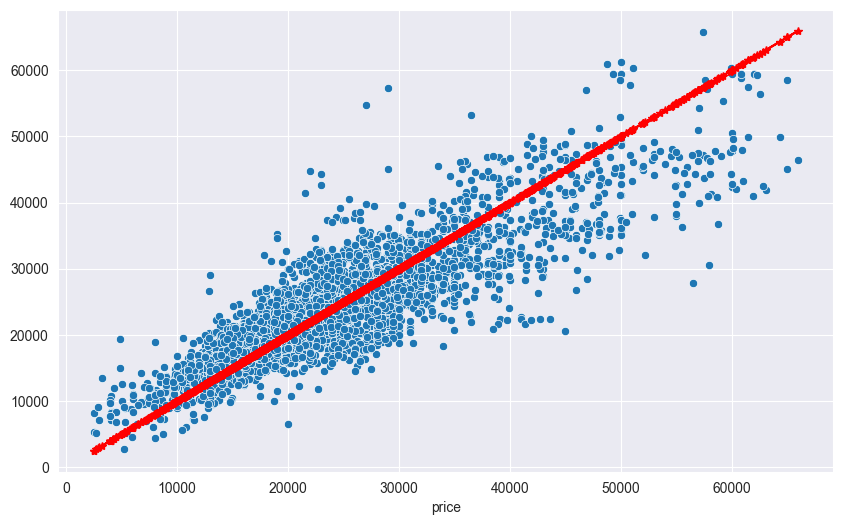

In [109]:
#isualize the results

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=pred.reshape(1,-1)[0])
plt.plot(y_test,y_test,"r-*")

In [123]:
#model demostration:

while True:
    print("Please enter the features of the car you want to predict the price:")
    print("year, ConsumingPerKm, engineSize, tax, TotalKm")
    print("press q to exit")
    year=int(input("year of car:"))
    KmAge=float(input("Total Km of car:"))
    tax=float(input("tax:"))
    Kmpg=float(input("consuming fuel value of car per Km :"))
    engineSize=float(input("engineSize:"))

    features=pd.Series([year,KmAge,tax,Kmpg,engineSize])
    
    features=mm.transform(features.values.reshape(-1,5))
    y_pred=sq.predict(features)
    print("Predicted Price:",y_pred[0][0])
    break

Please enter the features of the car you want to predict the price:
year, ConsumingPerKm, engineSize, tax, TotalKm
press q to exit
1/1 [==============================] - 0s 16ms/step
Predicted Price: 52952.98
